## 딥러닝 준비

# 주요용어

1. 하이퍼파라미터

- 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
- 모델의 예측성능을 높이기 위해 하이퍼파리미터 튜닝 필요

2. 과소적합  vs 과대적합

- 과소적합: 모델이 충분히 학습되지 않은 경우에 예측 성능이 떨어지는 것

- 과대적합: 학습 데이터를 지나치게 반복 학습하여 과하게 적합된 상태,

3. 에포크

- 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프


4. 손실함수

- 예측 값과 정답 값의 차이 또는 오차


In [1]:
# 지정하여 사용
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()
#함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법
- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소함수를 갖도록 하는 방법


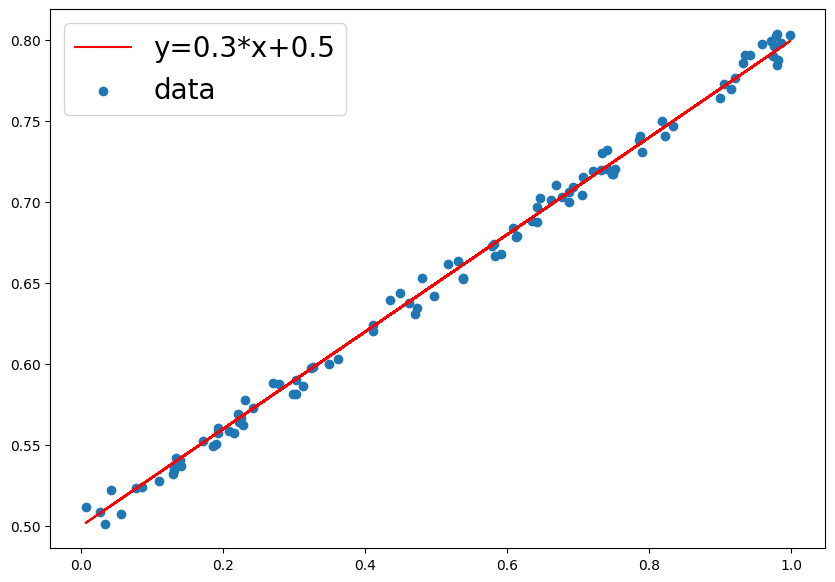

w:0.3, b:0.5


In [2]:
#경사하강법
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8,size=50,noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [4]:

#최대 반복 학습
num_epoch=1000

#학습률
learning_rate=0.005

#에러 기록
errors=[]

#random한 값으로 w,b를 초기화
w=np.random.uniform(low=0.0,high=1.0)
b=np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  #가설정의
  y_hat=w*x+b

  #손실함수 정의
  error=0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  #그레디언트 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2}w={1:.5f},b={2:.5f}error={3:.5f}".format(epoch,w,b,error))

print("----"*15)
print("{0:2}w={1:.5f},b={2:.5f}error={3:.5f}".format(epoch,w,b,error))

 0w=0.02845,b=0.67277error=0.54761
 5w=0.06508,b=0.63226error=0.27591
10w=0.10300,b=0.61078error=0.19571
15w=0.13493,b=0.59279error=0.13897
20w=0.16179,b=0.57765error=0.09883
25w=0.18438,b=0.56492error=0.07042
30w=0.20338,b=0.55421error=0.05032
35w=0.21937,b=0.54521error=0.03610
40w=0.23281,b=0.53763error=0.02604
45w=0.24412,b=0.53126error=0.01892
50w=0.25364,b=0.52590error=0.01388
55w=0.26164,b=0.52139error=0.01032
60w=0.26837,b=0.51759error=0.00780
65w=0.27403,b=0.51440error=0.00601
------------------------------------------------------------
69w=0.27699,b=0.51274error=0.00497


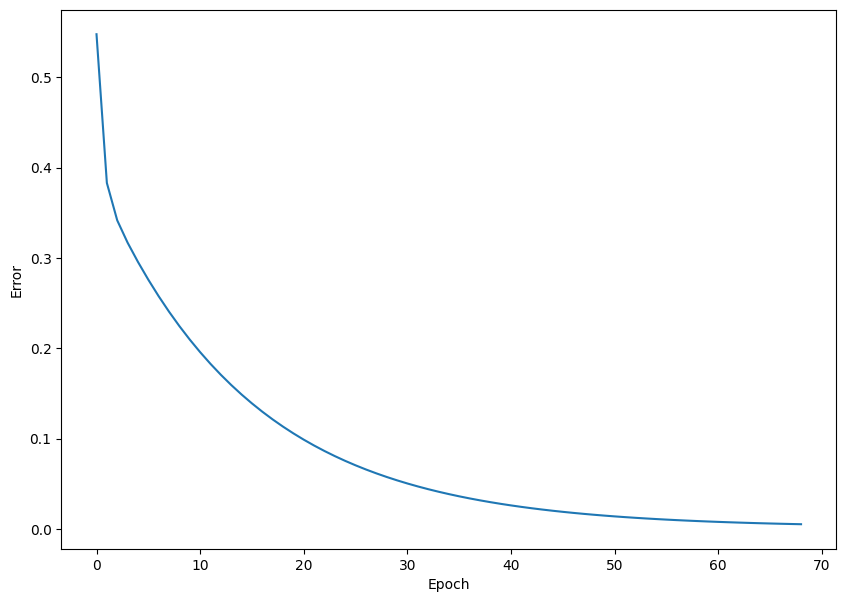

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# 딥러닝 프로세스

1-2-1 데이터 전처리 : 데이터 가공 단계


1-2-2 모델 생성 : 순차 또는 복잡 모델의 구조를 정의하고 생성

1-2-3 모델 컴파일 : 손실함수, 옵티마이저, 평가지표 등을 정의

1-2-4 모델 훈련 : fit() 함수에 필요한 정보를 파라미터로 전달. epoch, 배치 크기, 콜백 함수 지정

1-2-5 모델 검증 : 검증 데이터셋과 비교하여 평가지표 계산

1-2-6 모델 예측 : 예측 결과 반환

# 단순 신경망 훈련

1. 선형회귀

-  회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

2. 뉴런

- 인공신경망모델을 구성하는 하나의 신경= 노드

- 여러개의 레이어로 구성

3. Dense 레이어

- 심층 신경망 모델을 구성하는 가장 기본 레이어


In [7]:
import tensorflow as tf

#10개의 노드로 이루어진 덴스 레이어
tf.keras.layers.Dense(10)

#ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

4. 데이터셋 만들기



In [8]:
#샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


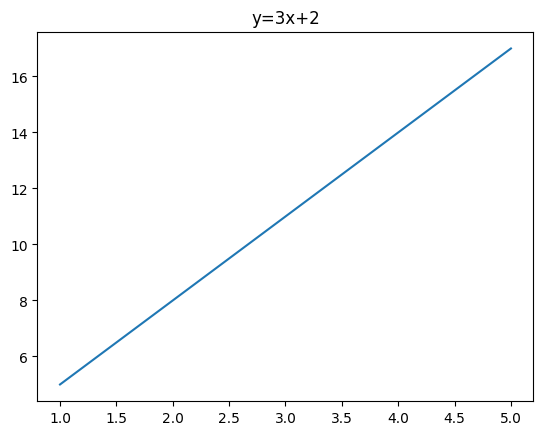

In [9]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

## 2- 5. Sequential API

- 층을 이어 붙이듯 시퀸스에 맞게 일렬로 연결하는 방식






## 모델구조

- 리스트형 정의 - 시퀀셜 함수로 레이어 지정

In [10]:
import tensorflow as tf

#리스트형
model=tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(5),
      tf.keras.layers.Dense(1)
])

In [11]:
#add함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 입력 데이터 형태

layer 1 -> input shape 지정 !

In [12]:
import tensorflow as tf
model=tf.keras.Sequential([
    #입력데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
                           ])

## 단순선형회귀 모델 정의

In [13]:
#단순선형회귀 모델 생성
model=tf.keras.Sequential([
       tf.keras.layers.Dense(1, input_shape=[1])
])

6. 모델 요약

- model.summary()로 모델의 요약 확인 가능



In [14]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [15]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse', metrics=['mse','mae'])

In [16]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError(

                       )])

##컴파일


모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의

In [17]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 훈련
- fit() 메소드를 적용하여 모델 훈련
- 가중치 텐서를 업데이트 하는 과정

In [18]:
#단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 603ms/step - loss: 114.3588 - mae: 10.0058
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 66.7451 - mae: 7.6844
Epoch 3/1200
1/1 [==============================] - 0s 15ms/step - loss: 38.9975 - mae: 5.9121
Epoch 4/1200
1/1 [==============================] - 0s 13ms/step - loss: 22.8269 - mae: 4.5591
Epoch 5/1200
1/1 [==============================] - 0s 14ms/step - loss: 13.4028 - mae: 3.5260
Epoch 6/1200
1/1 [==============================] - 0s 16ms/step - loss: 7.9102 - mae: 2.7372
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 4.7087 - mae: 2.1350
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.8424 - mae: 1.6750
Epoch 9/1200
1/1 [==============================] - 0s 13ms/step - loss: 1.7541 - mae: 1.3238
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.1193 - mae: 1.0555
Epoch 11/1200
1/1 [==============================] 

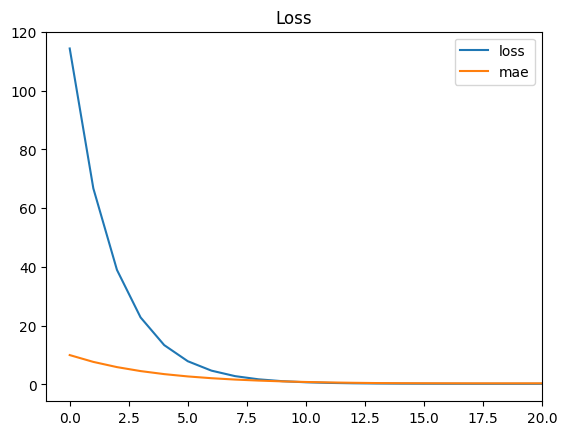

In [19]:
import matplotlib.pyplot as plt

#20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

9. 검증

In [20]:
#검증
model.evaluate(x,y)

1/1 [==============================] - 0s 241ms/step - loss: 7.3667e-05 - mae: 0.0074


[7.366693171206862e-05, 0.007366943173110485]

10. 예측

In [21]:
#예측
model.predict([10])

1/1 [==============================] - 0s 142ms/step


array([[32.035606]], dtype=float32)

## 심층 신경망으로 이미지 분류

이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성

1. 케라스 내장 데이터셋 로드


In [22]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [23]:
#load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


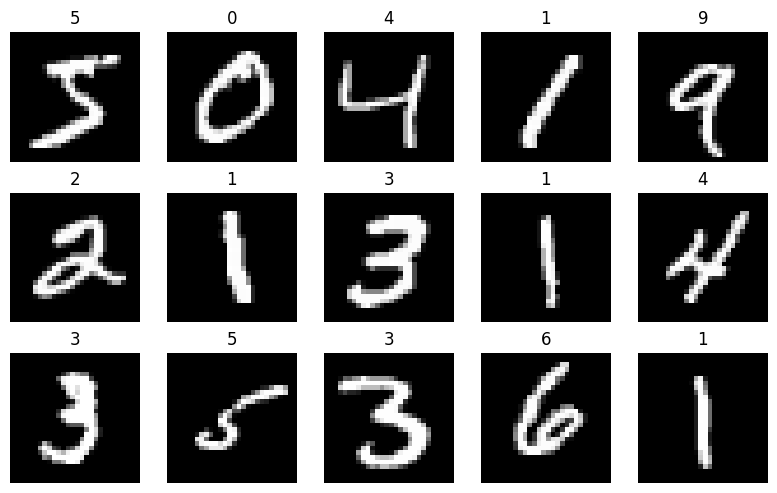

In [25]:
#데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5)
# Set the figure size in inches
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

2. 데이터 전처리 : 정규화를 통해 범위 조절 : 0-1 사이

In [26]:
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
#픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#정규화
x_train=x_train/x_train.max()

#정규화 후 최소최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
#test 셋에도 정규화 동일 적용
x_test=x_test/x_test.max()

In [ ]:
#변환 후 x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3. Flatten 레이어 -> 1차월 배열(Dense!)

In [29]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
ID로 shape 변경 후: (60000, 784)


In [30]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후:(60000, 784)


4. 활성화 함수

- 입력을 비선형 출력으로 변환해주는 함수

-  시그모이드, 하이퍼볼릭 탄젠트 등

In [31]:
#Dense 레이어에 relu 활성화 함수 적용할 경우
tf.keras.layers.Dense(128, activation='relu')

In [32]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

5. 입력과 출력

In [33]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
#출력층 노드=1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

6. 손실함수

In [35]:
#이진 분류 (출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [36]:
#y가 원핫 벡터인 경우
#[0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')

7. 옵티마이저

- 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

In [37]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

8. 평가지표

In [38]:
#클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [39]:
#문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##  9. 훈련


In [40]:
#훈련
model.fit(x_train, y_train,
          #검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2238 - accuracy: 0.9338 - val_loss: 0.1092 - val_accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0934 - accuracy: 0.9714 - val_loss: 0.0867 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0664 - accuracy: 0.9789 - val_loss: 0.1041 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0834 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0830 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0787 - val_ac

## 평가

In [41]:
#검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9811
검증 셋 정확도: 0.9811000227928162


11. 예측

In [42]:
#예측
prediction=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
#예측 결과 출력
prediction[0]

array([4.7882753e-11, 4.3988887e-08, 1.6275259e-11, 5.5191771e-07,
       3.7829136e-07, 4.0074613e-10, 6.0955147e-14, 9.9996036e-01,
       3.9163033e-09, 3.8627346e-05], dtype=float32)

In [44]:
import numpy as np

#0번 index 에 대한 예측 클래스 출력
print(np.argmax(prediction[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(prediction[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


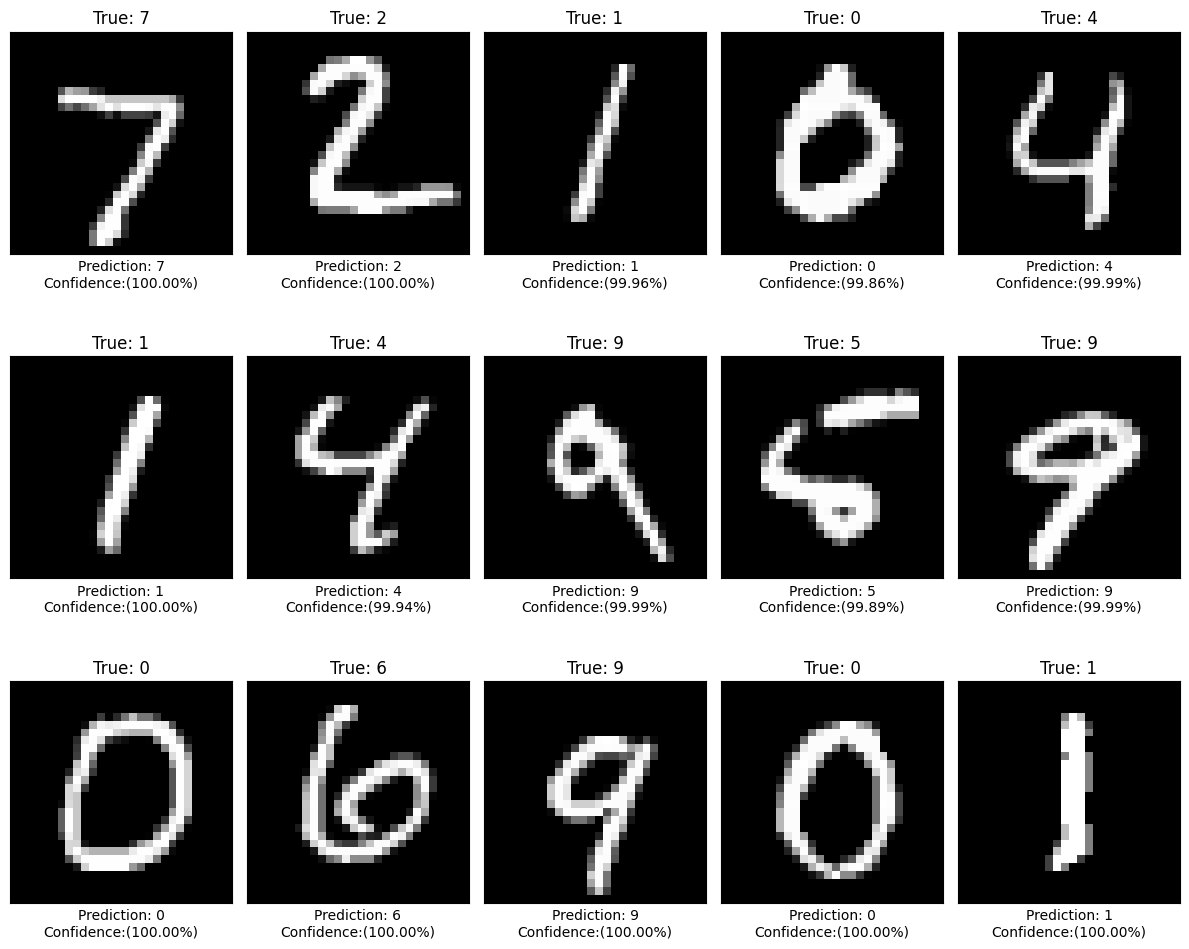

In [45]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(prediction[idx]), 100*np.max(prediction[idx])
  return img, y_true, y_pred, confidence
#canvas 생성
fig, axes=plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()